# Examine Trained RNN Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import motion, path_rnn

In [2]:
# Directory where test data is loaded from
TEST_DATA_DIR = 'data/sim_2022_04_19_polar'

# Path where model is saved
MODEL_FPATH = 'models/test_2022_04_19_03.pt'

# Number of units in RNN
NUM_UNITS = 100

## Load test data

In [3]:
sim_params, vel, pos = motion.load_simulation_results(TEST_DATA_DIR)

## Load model

In [4]:
model = path_rnn.PathRNN(n_units=NUM_UNITS)
model.load_state_dict(torch.load(MODEL_FPATH))
model.eval();

## Run model on all trials

In [5]:
# Convert velocity array to Tensor in order to run model
vel_t = torch.Tensor(vel)

# Predict estimated position
pos_est_t, u_vals_t = model(vel_t)

# Convert estimated position back to Numpy array
pos_est = pos_est_t.detach().numpy()
u_vals = u_vals_t.detach().numpy()

## Plot results

In [6]:
if sim_params['boundary_type'] == 'square':
    boundary = motion.SquareBoundary(sim_params['boundary_height'])
else:
    raise ValueError(f'Boundary not supported.')

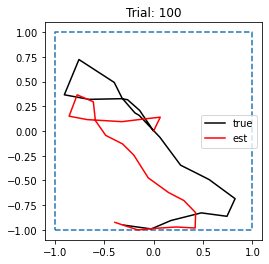

In [7]:
trial_plt = 100
t_start = 0
t_stop = 20

pos_plt = pos[trial_plt][t_start:t_stop]
pos_est_plt = pos_est[trial_plt][t_start:t_stop]

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')
motion.plot_position_estimate(boundary, pos_plt, pos_est_plt, ax)

## Check for bias in initial position

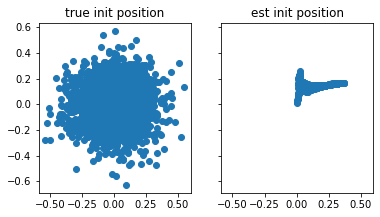

In [8]:
# True initial positions
x0 = pos[:, 0, 0]
y0 = pos[:, 0, 1]

# Estimated initial positions
x0_est = pos_est[:, 0, 0]
y0_est = pos_est[:, 0, 1]

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

ax[0].scatter(x0, y0)
ax[0].set_title('true init position')
ax[0].set_aspect(1.0)

ax[1].scatter(x0_est, y0_est)
ax[1].set_title('est init position')
ax[1].set_aspect(1.0)

plt.savefig('init_position_compare.png')

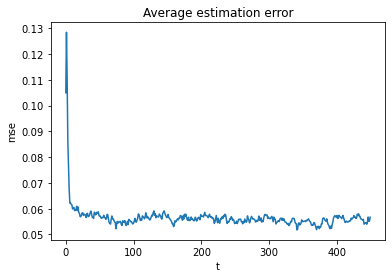

In [18]:
sq_err = np.sum((pos_est - pos) ** 2, axis=2)
mse = np.mean(sq_err, axis=0)
plt.plot(mse)
plt.title('Average estimation error')
plt.xlabel('t')
plt.ylabel('mse')

plt.savefig('avg_error.png')

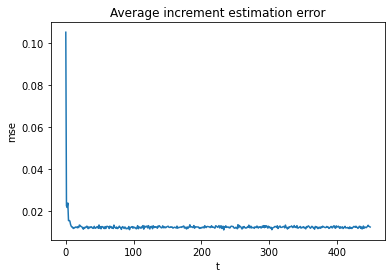

In [21]:
dpos = np.diff(pos, axis=1, prepend=0)
dpos_est = np.diff(pos_est, axis=1, prepend=0)

sq_err = np.sum((dpos_est - dpos) ** 2, axis=2)
mse = np.mean(sq_err, axis=0)
plt.plot(mse)
plt.title('Average increment estimation error')
plt.xlabel('t')
plt.ylabel('mse')

plt.savefig('inc_error.png')

In [9]:
for name, param in model.named_parameters():
    if name == 'rnn.weight_ih_l0':
        print(param)

Parameter containing:
tensor([[-0.0102, -0.2010],
        [ 0.0367,  0.0810],
        [ 0.1041, -0.1785],
        [-0.3053, -0.9694],
        [ 0.4750,  0.0697],
        [-0.1854, -0.5537],
        [-1.0153, -0.1522],
        [-0.3606,  0.2008],
        [-0.5086,  0.4153],
        [ 0.0036, -0.2464],
        [ 0.3472,  0.2808],
        [ 0.2104,  0.5256],
        [-0.7517,  0.5424],
        [ 0.8558, -0.4888],
        [ 1.1460, -0.2020],
        [-0.9513,  0.2163],
        [-0.9817,  0.9294],
        [ 0.8505, -0.5289],
        [-0.2613, -0.7167],
        [-1.5744,  0.5262],
        [-0.7322, -0.4625],
        [ 0.5656,  1.6013],
        [ 1.2545, -0.6233],
        [-0.1181, -0.1233],
        [-0.2901, -0.0156],
        [ 1.4809, -0.3522],
        [ 0.6789,  0.0793],
        [ 0.0176,  0.8008],
        [-0.8126, -1.0696],
        [-0.0834,  0.2410],
        [ 0.4433, -0.1479],
        [ 0.1608,  0.7521],
        [ 0.1125, -1.4264],
        [-0.1869, -2.2087],
        [-1.6285,  1.1621]

In [11]:
u_vals[0][0]

array([-0.21692649,  0.09791799, -0.16167715, -0.813456  ,  0.2092483 ,
       -0.57352   , -0.42804807,  0.1128221 ,  0.29391962, -0.25953364,
        0.38334677,  0.5577453 ,  0.35423633, -0.27492937,  0.11136249,
       -0.04021825,  0.618591  , -0.31593814, -0.69162405,  0.11492496,
       -0.6117747 ,  0.95590234, -0.30298364, -0.16594124, -0.10021234,
        0.0458334 ,  0.27442747,  0.7022757 , -0.8835883 ,  0.23247819,
       -0.03226846,  0.69643784, -0.9071679 , -0.9850498 ,  0.657325  ,
        0.41976097,  0.06368738,  0.42567345,  0.906101  , -0.06674176,
        0.19021805, -0.00530804,  0.14973874, -0.7032386 ,  0.2524615 ,
        0.11342474,  0.97972906, -0.12246238, -0.84789264,  0.86877227,
        0.74196476,  0.73622197,  0.22156557, -0.50396186, -0.14088382,
       -0.5480953 , -0.16803779, -0.5788769 ,  0.4975467 , -0.2677735 ,
        0.820343  , -0.571731  , -0.0579106 , -0.47428584, -0.32007152,
       -0.77103084, -0.6526265 ,  0.48512664,  0.85672206,  0.30